In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data Loading** 

In [2]:
data = pd.read_csv('./Documents/bollywood.csv')

In [3]:
data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
data.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

**Renaming Data Columns**


_This is to avoid naming inconsistency_

In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '')
data.columns

Index(['slno', 'releasedate', 'moviename', 'releasetime', 'genre', 'budget',
       'boxofficecollection', 'youtubeviews', 'youtubelikes',
       'youtubedislikes'],
      dtype='object')

In [6]:
data.describe()

,slno,budget,boxofficecollection,youtubeviews,youtubelikes,youtubedislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


**Checking Data Metadata**

The release date column is an _object_ not _dateTime_ later fixed using ```pd.to_datetime```

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   slno                 149 non-null    int64  
 1   releasedate          149 non-null    object 
 2   moviename            149 non-null    object 
 3   releasetime          149 non-null    object 
 4   genre                149 non-null    object 
 5   budget               149 non-null    int64  
 6   boxofficecollection  149 non-null    float64
 7   youtubeviews         149 non-null    int64  
 8   youtubelikes         149 non-null    int64  
 9   youtubedislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


**Analysing the Number of Movies released in each Genre**

Comedy has the hisghest no of releases

In [8]:
data['genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: genre, dtype: int64

**Analysing movies in each genre that got released in different release times like long weekend, festive
season, etc.**

In [22]:
pd.crosstab(data['genre'], data['releasetime'] )

releasetime,FS,HS,LW,N
genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [10]:
data['releasedate'] = pd.to_datetime(data['releasedate'])

**Creating the month column from the release date column**

This is after converting it to datetime

In [11]:
data['releasemonth'] = data['releasedate'].dt.month
data.head()

,slno,releasedate,moviename,releasetime,genre,budget,boxofficecollection,youtubeviews,youtubelikes,youtubedislikes,releasemonth
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7


**Analysing Month with highest number of high budget movies**

February has the highest number of release

In [12]:
data['releasemonth'][data['budget'] >= 25].value_counts()

2     9
1     8
3     7
8     7
11    6
7     6
9     5
6     5
4     4
10    4
5     3
12    2
Name: releasemonth, dtype: int64

**Created ROI column**

which is  _**(BoxOfficeCollection – Budget) / Budget**_

In [13]:
data['roi'] = (data['boxofficecollection'] - data['budget'])/data['budget']
data['roi'] = data['roi'].round(3)

**Getting top 10 movies with the highest ROI**

In [14]:
data[['roi','moviename']].sort_values('roi',ascending=False)[:10]

,roi,moviename
64,8.167,Aashiqui 2
89,7.647,PK
132,7.514,Grand Masti
135,7.500,The Lunchbox
87,6.240,Fukrey
58,5.933,Mary Kom
128,5.667,Shahid
37,5.500,Humpty Sharma Ki Dulhania
101,4.467,Bhaag Milkha Bhaag
115,4.267,Chennai Express


In [15]:
data.groupby('releasetime')['roi'].mean()

releasetime
FS    0.973941
HS    0.850722
LW    1.127267
N     0.657717
Name: roi, dtype: float64

**Movies Budget Distribution**

Showing most movies are low budgeted

<AxesSubplot:xlabel='budget', ylabel='Count'>

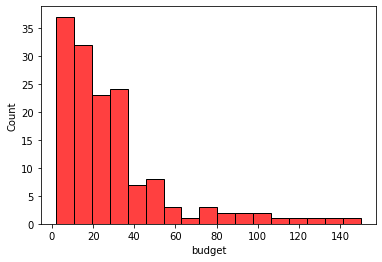

In [16]:
sns.histplot(data = data, x = 'budget', color='r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


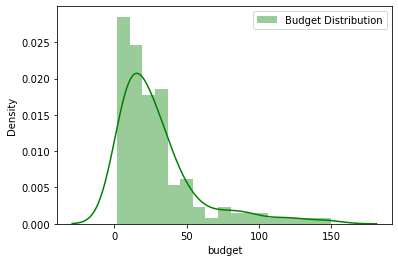

In [17]:
sns.distplot(data['budget'], color='g', label='Budget Distribution')
plt.legend()

**Comparing ROI between comedy movies and drama**

Comedy has the highest ROI

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


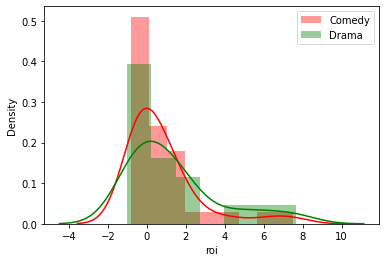

In [18]:
sns.distplot(data[data['genre']=='Comedy']['roi'], color='r', label='Comedy')
sns.distplot(data[data['genre']==' Drama ']['roi'], color='g', label='Drama')
plt.legend()

In [19]:
data[['boxofficecollection', 'youtubelikes']].corr()

,boxofficecollection,youtubelikes
boxofficecollection,1.000000,0.682517
youtubelikes,0.682517,1.000000


**Analysing movie genres with their number of youtube likes**

Action movies have the highest likes

<AxesSubplot:xlabel='genre', ylabel='youtubelikes'>

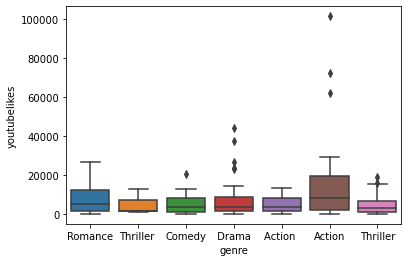

In [20]:
sns.boxplot(x = 'genre', y = 'youtubelikes', data = data)

**Checking for correllation among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,
YoutubeDislike**

YoutubeView and YoutubeLikes have the highest correlation

<AxesSubplot:>

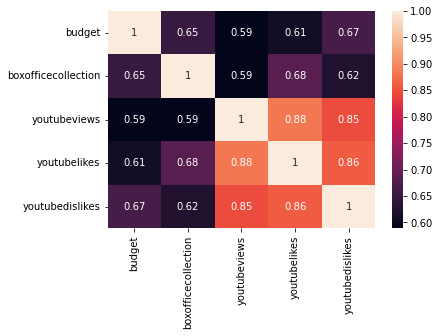

In [21]:
variables = ['budget', 'boxofficecollection', 'youtubeviews', 'youtubelikes','youtubedislikes']
sns.heatmap(data[variables].corr(), annot=True)